***
#  Book Sales Ranking in Amazon

***
<div class="span5 alert alert-info">
<p> Amazon is a popular ecommerce site that sells a wide range of products. Books are among the many categories. Amazon sells books in hardcover, softcover, and electronic versions, both new and used. Because of the popularity of Amazon sites, there are also a large number of reviews by readers. Some books have even tens of thousands of reviews. In addition to the large number of reviews available for each book, there is also a sales rank number available for each book. This rank is based on the number of items sold in a most recent period of time.  The more recent sales there are, the higher the rank is. A rank one would mean the best selling book, and a larger number would mean a lower rank. </p>
<p> The main questions are: </p>
<ul>
  <li> 1.Do some categories of books tend to get a higher book sales ranking than others?</li>
  <li>2.Do older books get better rankings than average?</li>
   <li>3.Are the review ratings indicative of the book sales rank? </li>
   <li>4.Is there any relationship between the book sales ranking and the total number of book reviews? </li>
</ul>
</div>

***


In [1]:
# first load in the required libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

joined_data = pd.read_csv('/Users/yizhao/Documents/First_capstone/joined_data.csv')

### 1.Do some categories of books tend to get a higher book sales ranking than others?
We would need to compare the overall distribution if book sales ranks to specific categories of book sales

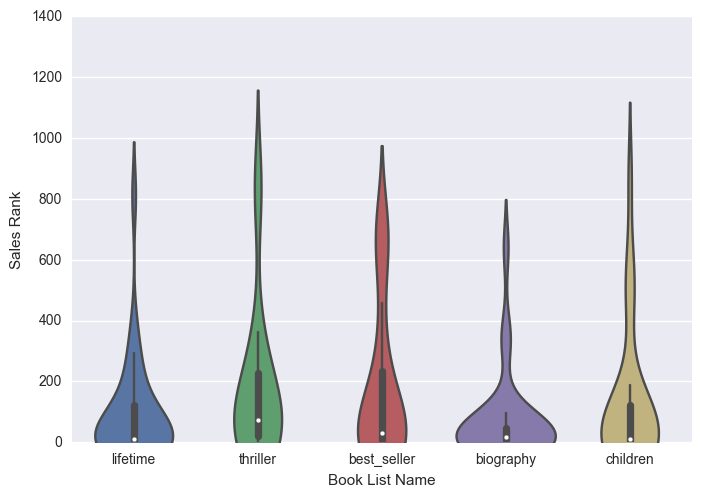

In [13]:
violin = sns.violinplot(y=joined_data.sales_rank, data= joined_data, x= joined_data.list_name)
axes = violin.axes

violin.set(xlabel= 'Book List Name', ylabel= 'Sales Rank')
axes.set_ylim(0,)
plt.show()

In [7]:
joined_data.groupby("list_name").size()

list_name
best_seller    29
biography      25
children       24
lifetime       29
thriller       19
dtype: int64

In [10]:
# quantiles of the sales rank
joined_data.sales_rank.quantile(q = [0.5, 0.75,0.9])

0.50     21.0
0.75    141.0
0.90    460.5
Name: sales_rank, dtype: float64

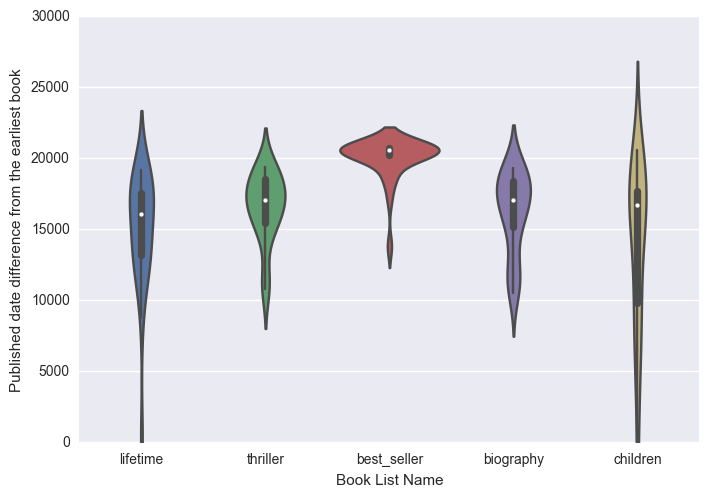

In [12]:
joined_data.list_name = joined_data.list_name.astype(str)
violin = sns.violinplot(y=joined_data.date_delta, data= joined_data, x= joined_data.list_name)
axes = violin.axes

violin.set(xlabel= 'Book List Name', ylabel= 'Published date difference from the earliest book')
axes.set_ylim(0,)
plt.show()

<div class="span5 alert alert-success">
<p> The overall distribution of book sales ranks are highly skewed to the right. More specifically, 50% of books in this dataset as a ranking of 21 or lower, and 75% of the books have a ranking of 141 or lower. </p>
<li>This skewness is also the case with all the book categories as shown in the violin plot. The sample sizes of those categories are very similar to each other, except there are fewer thriller books (19 as opposed to 24-29). Biographies have the strongest skewness, and lifetime must reads have the second strongest skewness. Thriller, bestseller and children's books are similar in their skewness. </li>
<li> The overall skewness from this dataset is expected, as all the books are sampled from the various editor's picks, or best selling books.  </li>
<li>In terms of how old those books are, lifetime must reads and children's books have the most older books. Th closer to zero in the publish data difference from the oldest book in the dataset, the older those books are. Bestseller books are the most recent ones compared to the other book lists. </li>
<p> That leads to the second question. Do older books have a better ranking in this dataset? </p>
</div>

### 2.Do older books get better rankings than average?

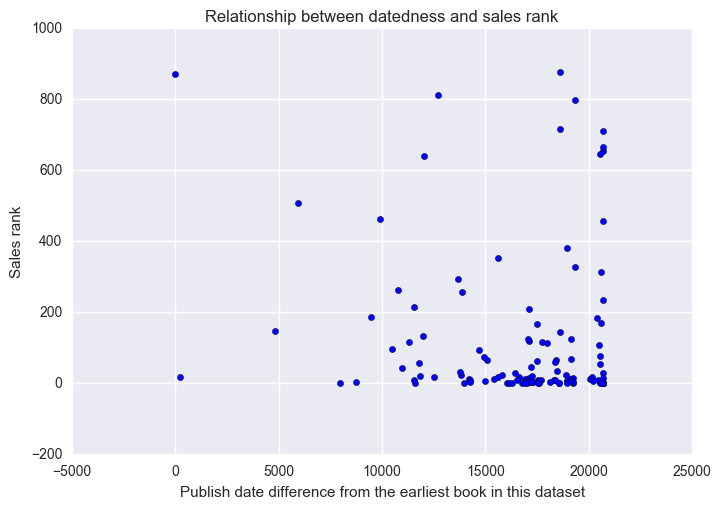

In [14]:
plt.scatter(joined_data.date_delta, joined_data.sales_rank)
plt.xlabel("Publish date difference from the earliest book in this dataset")
plt.ylabel("Sales rank")
plt.title("Relationship between datedness and sales rank")
plt.show()

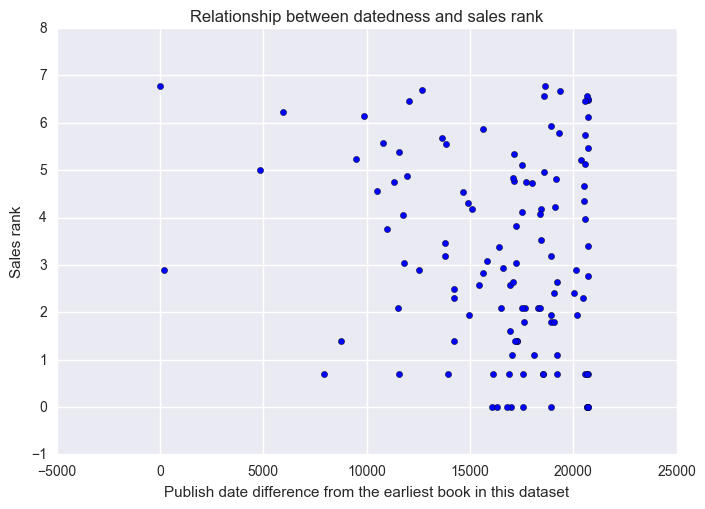

In [16]:
plt.scatter(joined_data.date_delta, np.log(joined_data.sales_rank))
plt.xlabel("Publish date difference from the earliest book in this dataset")
plt.ylabel("Sales rank")
plt.title("Relationship between datedness and sales rank")
plt.show()

<div class="span5 alert alert-success">
<p>Because of the sknewness in the sales rank,  a scatter plot between publish data difference and sales rank doesn't show any clear relationship. After a log transformation, the scatter plot becomes clearer in that there isn't any significant relationship between the publish date of a book and its sales rank. </p>
<p>It is good that our dataset doesn't resemble a bias in sales rank toward an earlier or later published book.</p>

### 3.Are the review ratings indicative of the book sales rank?
According to the earlier experiences, it is helpful to apply a log transformation to the sales rank data to help us examin trends.
Average rating is averaged from all the review ratings of a book, ranging from 1 to 5.

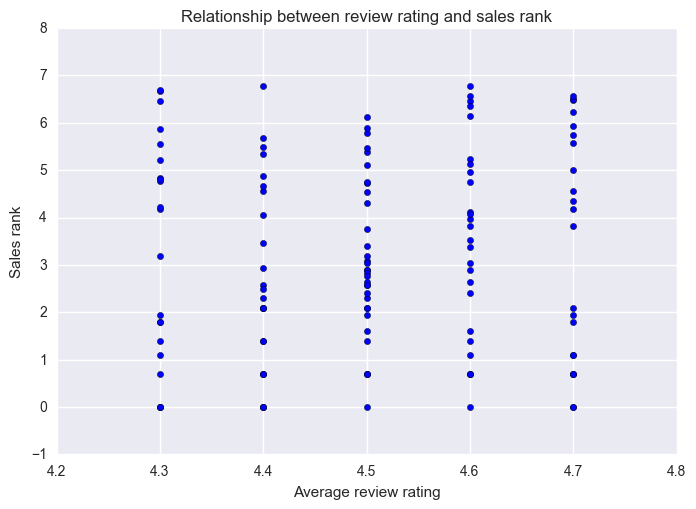

In [17]:
plt.scatter(joined_data.average_rating, np.log(joined_data.sales_rank))
plt.xlabel("Average review rating")
plt.ylabel("Sales rank")
plt.title("Relationship between review rating and sales rank")
plt.show()

<div class="span5 alert alert-success">
<p>The resulting scatter plot shows a more or less null plot. In other words, there is not any signficant relationship between sales ranking and the average review rating. Having a higher average review rating would not indicate a better sales ranking. </p>
<p> This might be because all the books sampled here are already relatively better rated than other books. In addition, the range of average review rating may be too small to capture the subtle differences among books that would eventually lead to vastly different sales rankings. 

### Is there any relationship between the book sales ranking and the total number of book reviews?
Even though the average review rating didn't imply any information on the sales ranking, the total number of reviews may indicate the popularity of a book and thus better indicate the sales performances.

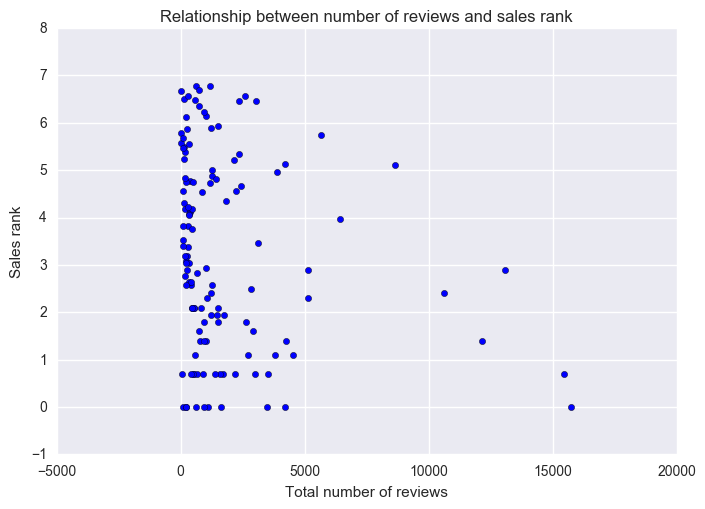

In [18]:
plt.scatter(joined_data.review_count, np.log(joined_data.sales_rank))
plt.xlabel("Total number of reviews")
plt.ylabel("Sales rank")
plt.title("Relationship between number of reviews and sales rank")
plt.show()

It appears that the total number of reviews is also vastly skewed to the right, so a log transformation will help with visualizing the relationship between sales rank and review volumn.

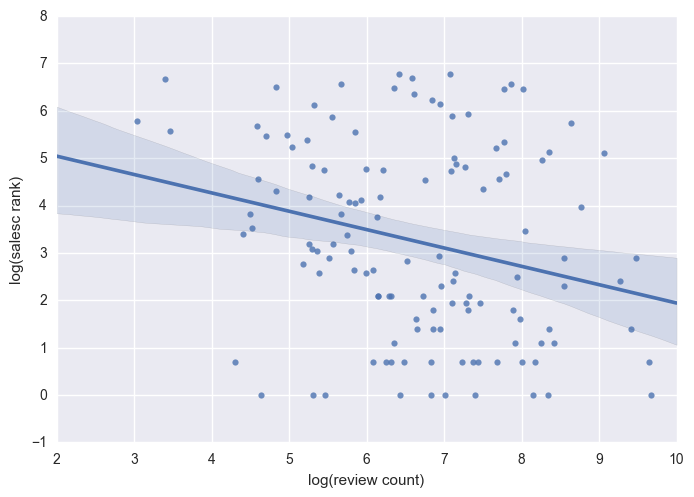

In [19]:
sns.regplot(y=np.log(joined_data.sales_rank), x=np.log(joined_data.review_count), data=joined_data, fit_reg = True)
plt.xlabel('log(review count)')
plt.ylabel('log(salesc rank)')
plt.show()

<div class="span5 alert alert-success">
<p> There appears to be a moderate negative linear relationship between the sales ranking and review count. It is expected that books with larger reviews would be more popular and thus also sell more. These books would have a lower sales ranking number, or a better sales performance.</p>
<p>According to the scatter plot, there are still a large number of books with a good sales ranking but still a wide range of review count, and also books with a bad sales ranking but a middle range of review counts. This means we still need to acquire data on other factors to explain the variation in sales ranking.</p>

In [20]:
# Run a linear regression to further test the trend between review count and sales rank
import statsmodels.api as sm
from statsmodels.formula.api import ols

joined_data['log_salesRank'] = np.log(joined_data.sales_rank)
joined_data['log_reviewCount'] = np.log(joined_data.review_count)


m = ols('log_salesRank ~ log_reviewCount ', joined_data).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:          log_salesRank   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     8.692
Date:                Thu, 29 Jun 2017   Prob (F-statistic):            0.00382
Time:                        21:54:24   Log-Likelihood:                -264.85
No. Observations:                 126   AIC:                             533.7
Df Residuals:                     124   BIC:                             539.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           5.8186      0.892     

<div class="span5 alert alert-success">
<p> Both the intercept and the review count are statistically significant to sales rank, as shown by the p-values in t-tests above.</p>
<p> However, only 6% of variation in sales rank can be explained (R-squared and adj-R-squared). </p>
<p> In conlusion, further data and asessments are needed to help with explaining and predicting book sales rank in Amazon. 